# ДЗ по "Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn"
##  Видеоурок 6. Обучение с учителем в Scikit-learn.
* Домашнее задание:  
[Практическое задание](https://gbcdn.mrgcdn.ru/uploads/asset/5788496/attachment/d8fe09d4348597c3d8cf86f8d459dc5d.pdf).

## Тема “Обучение с учителем””

In [1]:
# Устанавливаем пакеты есои они не установлены
# !pip install pandas
# !pip install numpy
# !pip install -U scikit-learn
# !pip install matplotlib

### Задание 1
- Импортируйте библиотеки `pandas` и `numpy`.
- Загрузите `Boston House Prices dataset` из встроенных наборов данных библиотеки `sklearn`.
- Разбейте эти датафреймы на тренировочные (`X_train`, `y_train`) и тестовые (`X_test`, `y_test`) с помощью функции `train_test_split` так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент `random state` должен быть равен 42.
- Создайте модель линейной регрессии под названием `lr` с помощью класса `LinearRegression` из модуля `sklearn.linear_model`.
- Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

In [2]:
# Загружаем необходимые библиотеки
import numpy as np
import pandas as pd

# Уберем warnings
import warnings
warnings.filterwarnings('ignore')

В новых версиях `scikit-learn` нет датасета `boston`, но хочется воспользоваться последней версией `scikit-learn`. Поэтому воспользуемся [инструкцией](https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html) приведённой на официальном сайте.

In [3]:
# Загрузим датасет Boston
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
# Название фичей
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
# Преобразуем его в датафрейм
# Фичи
X = pd.DataFrame(data, columns=feature_names)
# Таргет
y = pd.DataFrame(target, columns=['price'])

In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [8]:
# Модуль для зазбиения выборки на тренировочнию и тестовую
from sklearn.model_selection import train_test_split

# Разобьём выборку на тренировочную (70%) и тестовую (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [10]:
# Модуль линейной регрессии
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()
# Обучим модель
lr.fit(X_train, y_train)
# Выполним predict
y_pred_linear = lr.predict(X_test)

In [12]:
# Посмотрим реальные и предсказанные значения
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred_linear.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


Посмотрим, какие коэффициенты подобрала наша модель на этапе обучения. Свободный коэффициент $w_0$ хранится в атрибуте `.intercept_`:

In [13]:
lr.intercept_

array([31.63108404])

Остальные коэффициенты $w_1$, $\dots$, $w_n$ хранятся в атрибуте `.coef_`:

In [14]:
lr.coef_

array([[-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
         3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
        -1.08208352e-02, -1.38599824e+00,  2.42727340e-01,
        -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
        -5.47113313e-01]])

Давайте визуализируем то, какой вклад вносит каждый из этих коэффициентов:

In [15]:
from matplotlib import pyplot as plt
# Следующая магическая команда Jupyter Notebook нужна для того, чтобы графики отображались прямо в ноутбуке, а не в отдельном окне
%matplotlib inline
# Настройка более четкого отображения графиков
%config InlineBackend.figure_format = 'svg'

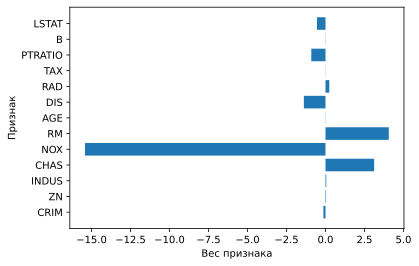

In [16]:
# Задаем размер фигуры
plt.rcParams['figure.figsize'] = 6, 4
# Задаём данные для отрисовки
plt.barh(feature_names, lr.coef_.flatten())
# Подписываем оси
plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

### Задание 2
- Создайте модель под названием `model` с помощью класса `RandomForestRegressor` из модуля `sklearn.ensemble`.
- Сделайте агрумент `n_estimators` равным 1000, `max_depth` должен быть равен 12 и `random_state` сделайте равным 42.
- Обучите модель на тренировочных данных аналогично тому, как вы обучали модель `LinearRegression`, но при этом в метод `fit` вместо датафрейма `y_train` поставьте `y_train.values[:, 0]`, чтобы получить из датафрейма одномерный массив Numpy, так как для класса `RandomForestRegressor` в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
- Сделайте предсказание на тестовых данных и посчитайте `R2`. Сравните с результатом из предыдущего задания.
- Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Создадим модель с количеством деревьев в лесу 1000, с максимальной глубиной залегания дерева 12
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [18]:
# Обучим модель
model.fit(X_train, y_train.values[:, 0])
# Выполним predict
y_pred_random_forest = model.predict(X_test)

Подсчитаем предсказания на тестовых данных и вычислим коэффициент [R2](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [19]:
from sklearn.metrics import r2_score

# Оценим предсказания по метрике R2 для модели RandomForestRegressor
r2_score(y_test, y_pred_random_forest)

0.87472606157312

In [20]:
# Оценим предсказания по метрике R2 для модели LinearRegression
r2_score(y_test, y_pred_linear)

0.7112260057484948

#### Вывод:
Модель регресии 'Случайный лес' предсказывает лучше, чем 'Линейная' модель регресии.

### *Задание 3
- Вызовите документацию для класса RandomForestRegressor, найдите информацию об атрибуте feature_importances_.
- С помощью этого атрибута найдите сумму всех показателей важности, установите, какие два признака показывают наибольшую важность.

In [21]:
?RandomForestRegressor.feature_importances_

Type:        property
String form: <property object at 0x0000024BA8967970>
Docstring:  
The impurity-based feature importances.

The higher, the more important the feature.
The importance of a feature is computed as the (normalized)
total reduction of the criterion brought by that feature.  It is also
known as the Gini importance.

high cardinality features (many unique values). See
:func:`sklearn.inspection.permutation_importance` as an alternative.

Returns
-------
feature_importances_ : ndarray of shape (n_features,)
    The values of this array sum to 1, unless all trees are single node
    trees consisting of only the root node, in which case it will be an
    array of zeros.

In [22]:
print(f'Сумма всех показателей важности = {sum(model.feature_importances_)}')

Сумма всех показателей важности = 1.0


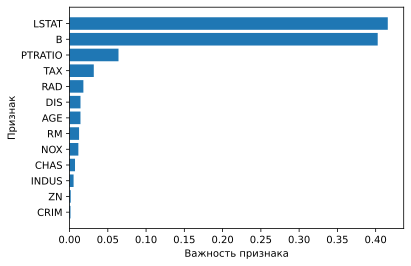

In [23]:
# Задаем размер фигуры
plt.rcParams['figure.figsize'] = 6, 4
# Задаём данные для отрисовки
plt.barh(feature_names, np.sort(model.feature_importances_))
# Подписываем оси
plt.xlabel("Важность признака")
plt.ylabel("Признак")

plt.show()

In [24]:
# Создадим массив Х
x = np.linspace(-3, 3, 51)
x

array([-3.  , -2.88, -2.76, -2.64, -2.52, -2.4 , -2.28, -2.16, -2.04,
       -1.92, -1.8 , -1.68, -1.56, -1.44, -1.32, -1.2 , -1.08, -0.96,
       -0.84, -0.72, -0.6 , -0.48, -0.36, -0.24, -0.12,  0.  ,  0.12,
        0.24,  0.36,  0.48,  0.6 ,  0.72,  0.84,  0.96,  1.08,  1.2 ,
        1.32,  1.44,  1.56,  1.68,  1.8 ,  1.92,  2.04,  2.16,  2.28,
        2.4 ,  2.52,  2.64,  2.76,  2.88,  3.  ])

In [25]:
# Создадим массивы y1, y2, y3, y4
y1 = x**2
y2 = 2 * x + 0.5
y3 = -3 * x - 1.5
y4 = np.sin(x)
print(y1)
print(y2)
print(y3)
print(y4)

[9.     8.2944 7.6176 6.9696 6.3504 5.76   5.1984 4.6656 4.1616 3.6864
 3.24   2.8224 2.4336 2.0736 1.7424 1.44   1.1664 0.9216 0.7056 0.5184
 0.36   0.2304 0.1296 0.0576 0.0144 0.     0.0144 0.0576 0.1296 0.2304
 0.36   0.5184 0.7056 0.9216 1.1664 1.44   1.7424 2.0736 2.4336 2.8224
 3.24   3.6864 4.1616 4.6656 5.1984 5.76   6.3504 6.9696 7.6176 8.2944
 9.    ]
[-5.5  -5.26 -5.02 -4.78 -4.54 -4.3  -4.06 -3.82 -3.58 -3.34 -3.1  -2.86
 -2.62 -2.38 -2.14 -1.9  -1.66 -1.42 -1.18 -0.94 -0.7  -0.46 -0.22  0.02
  0.26  0.5   0.74  0.98  1.22  1.46  1.7   1.94  2.18  2.42  2.66  2.9
  3.14  3.38  3.62  3.86  4.1   4.34  4.58  4.82  5.06  5.3   5.54  5.78
  6.02  6.26  6.5 ]
[  7.5    7.14   6.78   6.42   6.06   5.7    5.34   4.98   4.62   4.26
   3.9    3.54   3.18   2.82   2.46   2.1    1.74   1.38   1.02   0.66
   0.3   -0.06  -0.42  -0.78  -1.14  -1.5   -1.86  -2.22  -2.58  -2.94
  -3.3   -3.66  -4.02  -4.38  -4.74  -5.1   -5.46  -5.82  -6.18  -6.54
  -6.9   -7.26  -7.62  -7.98  -8.34  -8.7

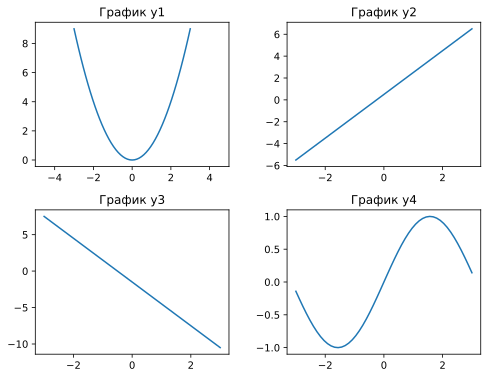

In [26]:
# Создаём массив 2х2 для графиков
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

# Задаём размеры фигуры 8х6 дюймов
fig.set_size_inches(8, 6)
# Зазоры между графиками по вертикали и горизонтали
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.plot(x, y1)
# Название графика
ax1.set_title("График y1")
# Задаём границы оси по Х
ax1.set_xlim([-5, 5])

ax2.plot(x, y2)
ax2.set_title("График y2")

ax3.plot(x, y3)
ax3.set_title("График y3")

ax4.plot(x, y4)
ax4.set_title("График y4")

plt.show()

In [27]:
# Импоррртируем библиотеку pandas
import pandas as pd
# Установим стиль для графиков 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# Читаем csv файл
df = pd.read_csv('./creditcard.csv', engine='python', on_bad_lines='skip')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
df.shape

(284807, 31)

In [29]:
# Подсчитаем количество уникальных значений в целевой переменной 'Class'
class_value = df['Class'].value_counts()
class_value

Class
0    284315
1       492
Name: count, dtype: int64

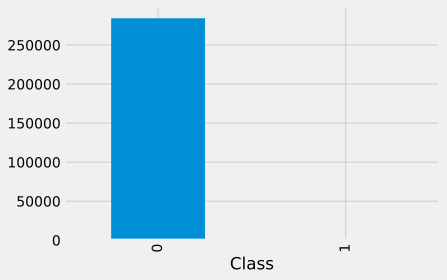

In [30]:
# Построим столбчатую диаграмму
class_value.plot(kind="bar")

plt.show()

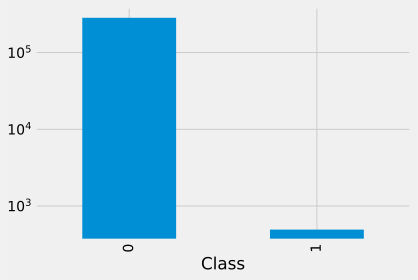

In [31]:
# Диаграмма с использованием логарифмического масштаба
class_value.plot(kind="bar", logy=True)

plt.show()

In [32]:
# Мошенники
scammers = df.query('Class == 1')['V1']
scammers

541      -2.312227
623      -3.043541
4920     -2.303350
6108     -4.397974
6329      1.234235
            ...   
279863   -1.927883
280143    1.378559
280149   -0.676143
281144   -3.113832
281674    1.991976
Name: V1, Length: 492, dtype: float64

In [33]:
# Нормальные
normal = df[df['Class'] == 0]['V1']
normal

0         -1.359807
1          1.191857
2         -1.358354
3         -0.966272
4         -1.158233
            ...    
284802   -11.881118
284803    -0.732789
284804     1.919565
284805    -0.240440
284806    -0.533413
Name: V1, Length: 284315, dtype: float64

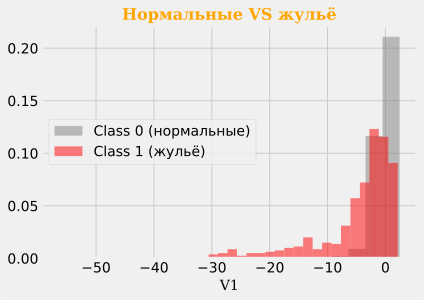

In [34]:
# Параметры заголовка
title_font = {
    "fontsize": 16,
    "fontweight": "bold",
    "color": "#FFA500",
    "family": "serif",
}

# Параметры надписей
label_font = {
    "fontsize": 14,
    "family": "serif",
}

# Графики с осью плотности распределения, заданной прозрачностью, цветом и бинами
plt.hist(normal, density=True, bins=20, alpha=0.5, color="grey", label="Class 0 (нормальные)")
plt.hist(scammers, density=True, bins=20, alpha=0.5, color="red", label="Class 1 (жульё)")
# Подпись оси Х
plt.xlabel("V1", fontdict=label_font)
# Название графика
plt.title("Нормальные VS жульё", fontdict=title_font)
# Отображаем легенду графика
plt.legend(loc="center left")

plt.show()

#### 1. Создать одномерный массив Numpy под названием `a` из 12 последовательных целых чисел чисел от 12 до 24 невключительно

In [35]:
a = np.arange(12, 24)
a

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

#### 2. Создать 5 двумерных массивов разной формы из массива `a`. Не использовать в аргументах метода `reshape` число -1.

In [36]:
a1 = a.reshape(2, 6)
a1

array([[12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [37]:
a2 = a.reshape(3, 4)
a2

array([[12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [38]:
a3 = a.reshape(4, 3)
a3

array([[12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23]])

In [39]:
a4 = a.reshape(6, 2) 
a4

array([[12, 13],
       [14, 15],
       [16, 17],
       [18, 19],
       [20, 21],
       [22, 23]])

In [40]:
a5 = a.reshape(12, 1)
a5

array([[12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23]])

#### 3. Создать 5 двумерных массивов разной формы из массива `a`. Использовать в аргументах метода `reshape` число -1 (в трех примерах - для обозначения числа столбцов, в двух - для строк).

In [41]:
a1 = a.reshape(2, -1)
a1

array([[12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [42]:
a2 = a.reshape(3, -1)
a2

array([[12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [43]:
a3 = a.reshape(4, -1)
a3

array([[12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23]])

In [44]:
a4 = a.reshape(-1, 2)
a4

array([[12, 13],
       [14, 15],
       [16, 17],
       [18, 19],
       [20, 21],
       [22, 23]])

In [45]:
a5 = a.reshape(-1, 1)
a5

array([[12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23]])

#### 4. Можно ли массив Numpy, состоящий из одного столбца и 12 строк, назвать одномерным?

In [46]:
a5

array([[12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23]])

In [47]:
a5[2, 0]

14

In [48]:
a5.shape

(12, 1)

##### Думаю, что это двумерный массив, посколько нужно указывать два индекса, чтобы получить элемент.

#### 5. Создать массив из 3 строк и 4 столбцов, состоящий из случайных чисел с плавающей запятой из нормального распределения со средним, равным 0 и среднеквадратичным отклонением, равным 1.0. Получить из этого массива одномерный массив с таким же атрибутом `size`, как и исходный массив.  

[Модуль random](https://www.dmitrymakarov.ru/python/random-11-03/)

In [49]:
# зададим точку отсчета
np.random.seed(245)

# создадим массив 3х4 (12 значений) нормально распределенной величины с матожиданием 0 и СКО 1
b = np.random.normal(0, 1, 12).reshape(3, -1)
b

array([[-0.23276742,  0.81853041, -0.97334932, -0.09361855],
       [ 1.22394124, -0.83015668,  0.70625833,  0.14231432],
       [ 0.07152523, -0.54676696,  1.43105111, -2.14285385]])

In [50]:
print(f'Среднее значение: {b.mean()}, Среднеквадратичное отклонение: {b.std()}')

Среднее значение: -0.0354910131748822, Среднеквадратичное отклонение: 0.9710508504124394


In [51]:
b2 = b.reshape(-1)
b2

array([-0.23276742,  0.81853041, -0.97334932, -0.09361855,  1.22394124,
       -0.83015668,  0.70625833,  0.14231432,  0.07152523, -0.54676696,
        1.43105111, -2.14285385])

In [52]:
b.size == b2.size

True

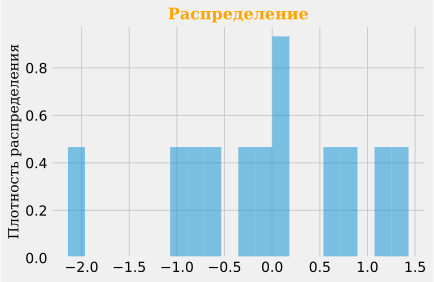

In [53]:
# Посмотрим на распределение
plt.hist(b2, density=True, bins=20, alpha=0.5)
# Название графика
plt.title("Распределение", fontdict=title_font)
# Подпишем ось y
plt.ylabel("Плотность распределения", fontdict=label_font)

plt.show()

#### 6. Создать массив `a`, состоящий из целых чисел, убывающих от 20 до 0 невключительно с интервалом 2.

In [54]:
a = np.arange(20, 0, -2)
a

array([20, 18, 16, 14, 12, 10,  8,  6,  4,  2])

#### 7. Создать массив `b`, состоящий из 1 строки и 10 столбцов: целых чисел, убывающих от 20 до 1 невключительно с интервалом 2. В чем разница между массивами `a` и `b`?

In [55]:
b = np.arange(20, 1, -2).reshape(1, 10)
b

array([[20, 18, 16, 14, 12, 10,  8,  6,  4,  2]])

In [56]:
a.shape

(10,)

In [57]:
b.shape

(1, 10)

##### Разница в том, что массив `a` одномерный, а массив `b` двумерный.

#### 8. Вертикально соединить массивы `a` и `b`. `a` - двумерный массив из нулей, число строк которого больше 1 и на 1 меньше, чем число строк двумерного массива `b`, состоящего из единиц. Итоговый массив `v` должен иметь атрибут `size`, равный 10.

In [58]:
a = np.zeros((3, 2))
a

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [59]:
b = np.ones((2, 2))
b

array([[1., 1.],
       [1., 1.]])

In [60]:
# Способ 1
v = np.vstack((a, b))
v

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.]])

In [61]:
v.size

10

In [62]:
# Способ 2
v = np.concatenate((a, b), axis=0)
v

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.]])

In [63]:
v.size

10

#### 9. Создать одномерный массив `а`, состоящий из последовательности целых чисел от 0 до 12. Поменять форму этого массива, чтобы получилась матрица `A` (двумерный массив Numpy), состоящая из 4 строк и 3 столбцов. Получить матрицу `At` путем транспонирования матрицы `A`. Получить матрицу `B`, умножив матрицу `A` на матрицу `At` с помощью матричного умножения. Какой размер имеет матрица `B`? Получится ли вычислить обратную матрицу для матрицы `B` и почему?

In [64]:
a = np.arange(1, 13)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [65]:
A = a.reshape(4, 3)
A

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [66]:
At = A.T
At

array([[ 1,  4,  7, 10],
       [ 2,  5,  8, 11],
       [ 3,  6,  9, 12]])

In [67]:
B =  A.dot(At)
B

array([[ 14,  32,  50,  68],
       [ 32,  77, 122, 167],
       [ 50, 122, 194, 266],
       [ 68, 167, 266, 365]])

In [68]:
B.shape

(4, 4)

In [69]:
def calc_param_matrix(matrix):
    '''
    Функция вычисляет определитель матрицы и обратную матрицу.
    
    :param matrix: Исследуемая матрица,
    :return: вердикт в txt, обратная матрица.
    '''
    result_out = 'Определитель матрицы равен 0, обратную матрицу вычислить нельзя'
    matrix_1 = 0
    
    # Вычисляем определитель матрицы
    D = np.round(np.linalg.det(matrix), decimals=2)
    
    # Проверяем, чему равен определитель матрицы, если нулю, то  обратную матрицу вычислить нельзя
    if D:
        result_out = f'Определитель матрицы равен: {D}\n'
        # Вычислим ранг матрицы
        rang = np.linalg.matrix_rank(matrix)
        result_out += f'Ранг матрицы равен: {rang}\n'
        # Вычисляем обратную матрицу
        matrix_1 = np.linalg.inv(matrix)
        result_out += 'Обратная матрица\n'
        result_out += np.array2string(matrix_1)
        # Проверяем перемножаем матрицу и обратную матрицу, получим единичную матрицу
        result_out += '\nПроверка (матрица * обратная матрица)\n'
        result_out += np.array2string(np.round(matrix_1.dot(matrix), decimals=2))
    
    return result_out, matrix_1


In [70]:
# print(calc_param_matrix([[1.,2], [3, 4]])[0])    # тест
print(calc_param_matrix(B)[0])

Определитель матрицы равен 0, обратную матрицу вычислить нельзя


##### Матрица B имеет размер 4х4, обратную матрицу вычислить нельзя, по скольку определитель матрицы равен 0

#### 10. Инициализируйте генератор случайных числе с помощью объекта `seed`, равного 42.

In [71]:
# Инициализируем генератор случайных чисел
np.random.seed(42)

#### 11. Создайте одномерный массив c, составленный из последовательности 16-ти случайных равномерно распределенных целых чисел от 0 до 16 невключительно.

[Модули math и numpy](https://education.yandex.ru/handbook/python/article/moduli-math-i-numpy)  
[Работа со случайными величинами (numpy.random и scipy.stats)](https://miptstats.github.io/courses/python/07_random.html)

In [72]:
# Случайные равномерно распределённые числа
a = np.random.uniform(0, 15, 16).astype(int)
a

array([ 5, 14, 10,  8,  2,  2,  0, 12,  9, 10,  0, 14, 12,  3,  2,  2])

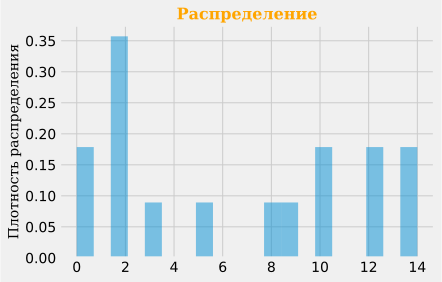

In [73]:
# Посмотрим на распределение
plt.hist(a, density=True, bins=20, alpha=0.5)
# Название графика
plt.title("Распределение", fontdict=title_font)
# Подпишем ось y
plt.ylabel("Плотность распределения", fontdict=label_font)

plt.show()

#### 12. Поменяйте его форму так, чтобы получилась квадратная матрица `C`. Получите матрицу `D`, поэлементно прибавив матрицу `B` из предыдущего вопроса к матрице `C`, умноженной на 10. Вычислите определитель, ранг и обратную матрицу `D_inv` для `D`.

In [74]:
C = a.reshape(4, -1)
C

array([[ 5, 14, 10,  8],
       [ 2,  2,  0, 12],
       [ 9, 10,  0, 14],
       [12,  3,  2,  2]])

In [75]:
B

array([[ 14,  32,  50,  68],
       [ 32,  77, 122, 167],
       [ 50, 122, 194, 266],
       [ 68, 167, 266, 365]])

In [76]:
D = B + C * 10
D

array([[ 64, 172, 150, 148],
       [ 52,  97, 122, 287],
       [140, 222, 194, 406],
       [188, 197, 286, 385]])

In [77]:
log_matrix, D_inv = calc_param_matrix(D)
print(log_matrix)

Определитель матрицы равен: -240003600.0
Ранг матрицы равен: 4
Обратная матрица
[[-0.01069059 -0.01753274  0.01088059  0.00570541]
 [ 0.0066919  -0.00517076  0.0068739  -0.00596674]
 [ 0.0066744   0.0088072  -0.01427379  0.00592124]
 [-0.00316195  0.00466476  0.00177297 -0.00153414]]
Проверка (матрица * обратная матрица)
[[ 1.  0.  0.  0.]
 [ 0.  1. -0. -0.]
 [ 0. -0.  1. -0.]
 [-0. -0. -0.  1.]]


In [78]:
# Посмотрим, что записалось
D_inv

array([[-0.01069059, -0.01753274,  0.01088059,  0.00570541],
       [ 0.0066919 , -0.00517076,  0.0068739 , -0.00596674],
       [ 0.0066744 ,  0.0088072 , -0.01427379,  0.00592124],
       [-0.00316195,  0.00466476,  0.00177297, -0.00153414]])

#### 13. Приравняйте к нулю отрицательные числа в матрице `D_inv`, а положительные - к единице. Убедитесь, что в матрице `D_inv` остались только нули и единицы. С помощью функции `numpy.where`, используя матрицу `D_inv` в качестве маски, а матрицы `B` и `C` - в качестве источников данных, получите матрицу `E` размером 4x4. Элементы матрицы `E`, для которых соответствующий элемент матрицы `D_inv` равен 1, должны быть равны соответствующему элементу матрицы `B`, а элементы матрицы `E`, для которых соответствующий элемент матрицы `D_inv` равен 0, должны быть равны соответствующему элементу матрицы `C`.

In [79]:
# Заменим данные > 0 на 1, < 0 на 0? 
D_inv[D_inv > 0] = 1
D_inv[D_inv < 0] = 0
D_inv = D_inv.astype(int)
D_inv

array([[0, 0, 1, 1],
       [1, 0, 1, 0],
       [1, 1, 0, 1],
       [0, 1, 1, 0]])

In [80]:
# Создадим пустую матрицу 4ч=х4
E = np.zeros((4, 4))
E

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [81]:
# Перенесём в матрицу E элементы из матрицы В накладывая маску D_inv (условие в маске, переносим элементы равные 1 в маске)
E[np.where(D_inv == 1)] = B[np.where(D_inv == 1)] 
E

array([[  0.,   0.,  50.,  68.],
       [ 32.,   0., 122.,   0.],
       [ 50., 122.,   0., 266.],
       [  0., 167., 266.,   0.]])

In [82]:
# Перенесём в матрицу E элементы из матрицы С накладывая маску D_inv (условие в маске, переносим элементы равные 0 в маске)
E[np.where(D_inv == 0)] = C[np.where(D_inv == 0)] 
E = E.astype(int)
E

array([[  5,  14,  50,  68],
       [ 32,   2, 122,  12],
       [ 50, 122,   0, 266],
       [ 12, 167, 266,   2]])